In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

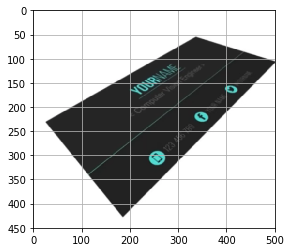

In [2]:
# read the image
image = cv2.imread('skewed_card.png')

# make a copy of the image
image_copy = np.copy(image)

# change the color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.axis([0, 500, 450, 0])
plt.grid(True)
plt.imshow(image_copy)

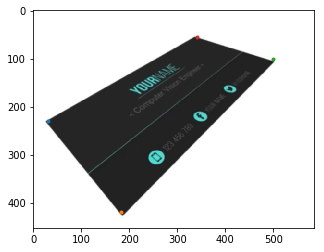

In [3]:
plt.imshow(image_copy)

# find and select four points in source image
# approximation is okay for this example

# This places a dot at these points (x, y, '.')
plt.plot(30, 230, '.') # top left corner
plt.plot(182, 420, '.') # bottom left corner
plt.plot(500, 100, '.') # bottom right corner
plt.plot(340, 55, '.') # top right corner

### Define the geometric transform

In [4]:
def warp(image):
    
    # four source coordinates, which define a rectangular plane
    source_pts = np.float32([
        [30, 230],
        [182, 420],
        [500, 100],
        [340, 55]])
    
    # four warped coordinates
    warped_pts = np.float32([[100,200], [100,550], [800,550], [800,200]])
    
    # compute the perspective tansform, M
    M = cv2.getPerspectiveTransform(source_pts, warped_pts)
    
    M_inv = cv2.getPerspectiveTransform(warped_pts, source_pts)
    
    image_size = (image.shape[1]+300, image.shape[0]+300)
    
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    
    return warped

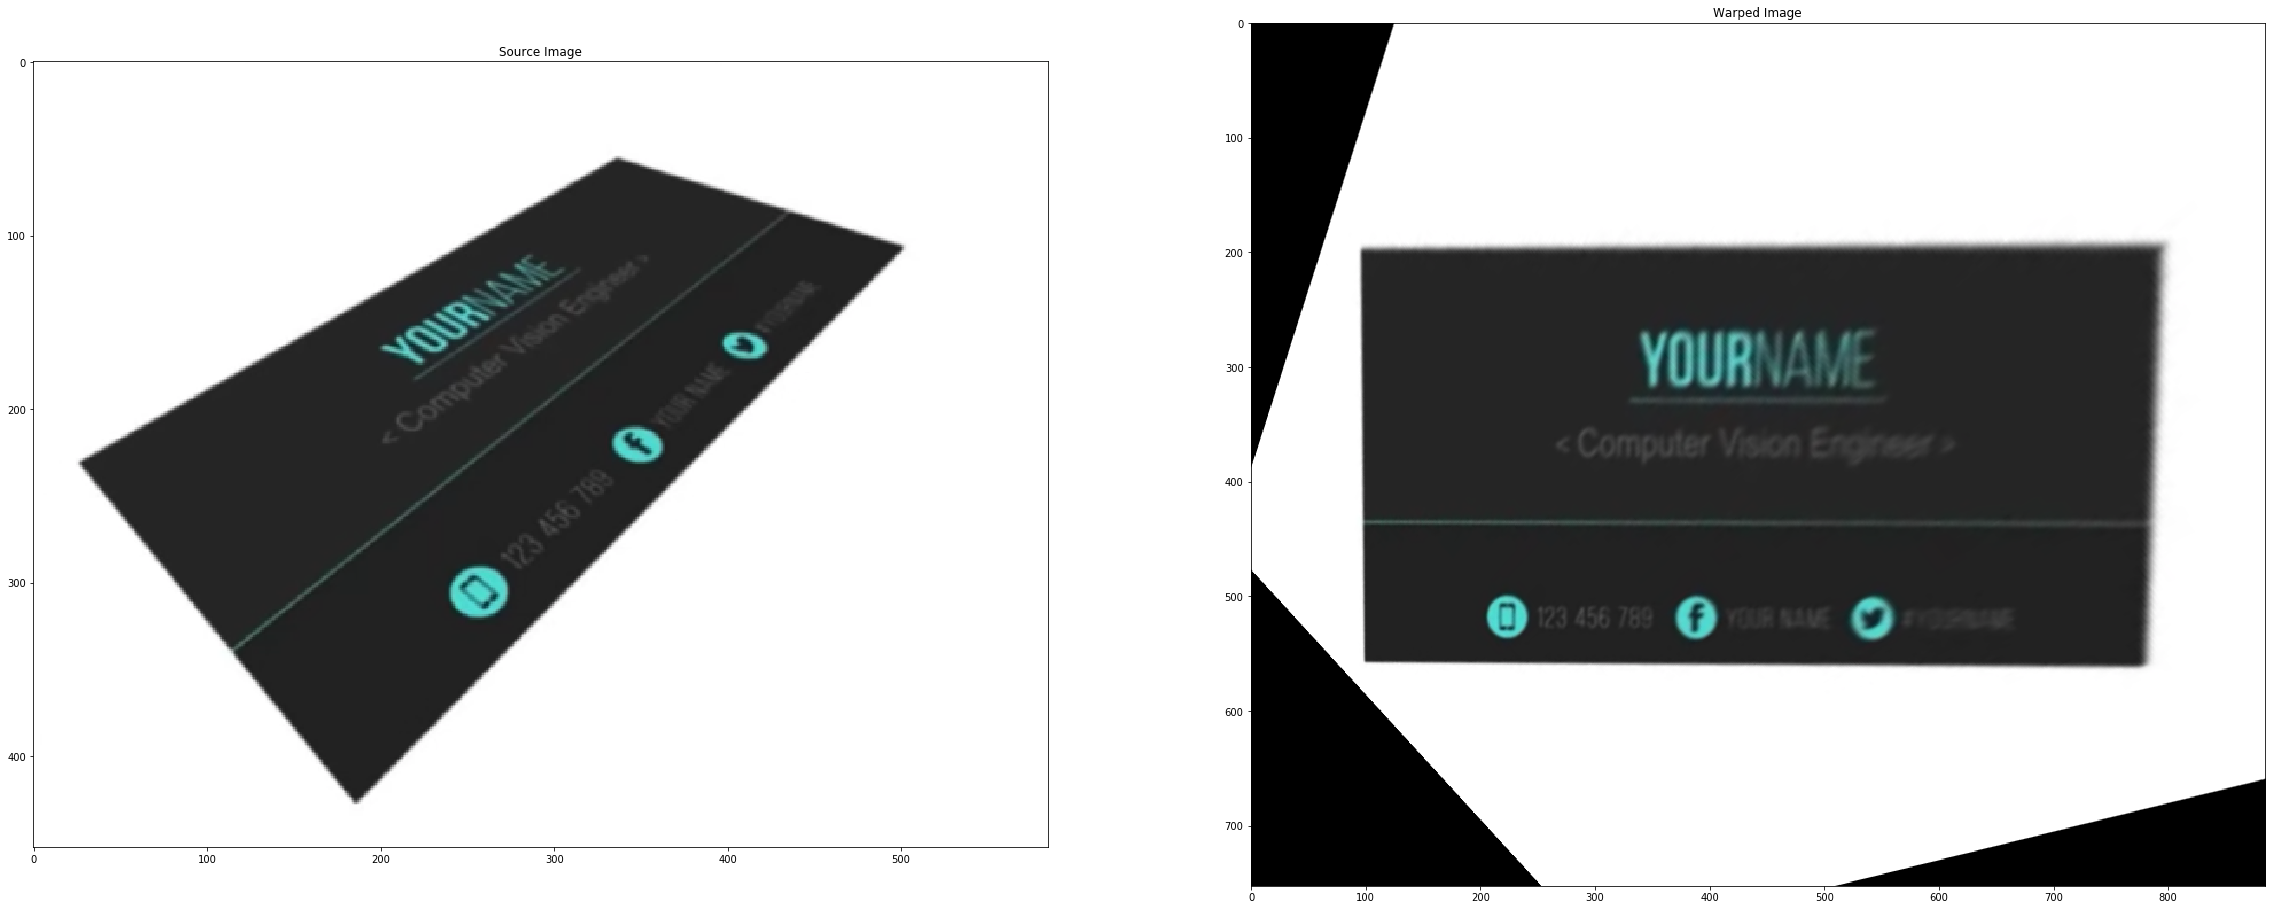

In [5]:
warped_image = warp(image_copy)

# create side-by-side plots
f, (ax1, ax2) = plt.subplots(1,2, figsize=(40,60))

ax1.set_title('Source Image')
ax1.imshow(image_copy)

ax2.set_title('Warped Image')
plt.imshow(warped_image)